In [2]:
from google.colab import files
uploaded = files.upload()

Saving spotify_df_merged.csv to spotify_df_merged.csv


In [2]:
# Converting into a data frame
import pandas as pd

df = pd.read_csv("spotify_df_merged.csv")

# Checking data structure
print(df.head())

                       id                   name                  album  \
0  7lmeHLHBe4nmXzuXc0HDjk                Testify                Testify   
1  1wsRitfRRtWyEapl0q22o8        Guerrilla Radio        Guerrilla Radio   
2  1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb       Calm Like a Bomb   
3  2lbASgTSoDO7MTuLAXlTW0              Mic Check              Mic Check   
4  1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire  Sleep Now In the Fire   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
2  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
3  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
4  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']             1            1     False   
1  ['2d0hyoQ5ynDBnkvAbJKORj']             2           

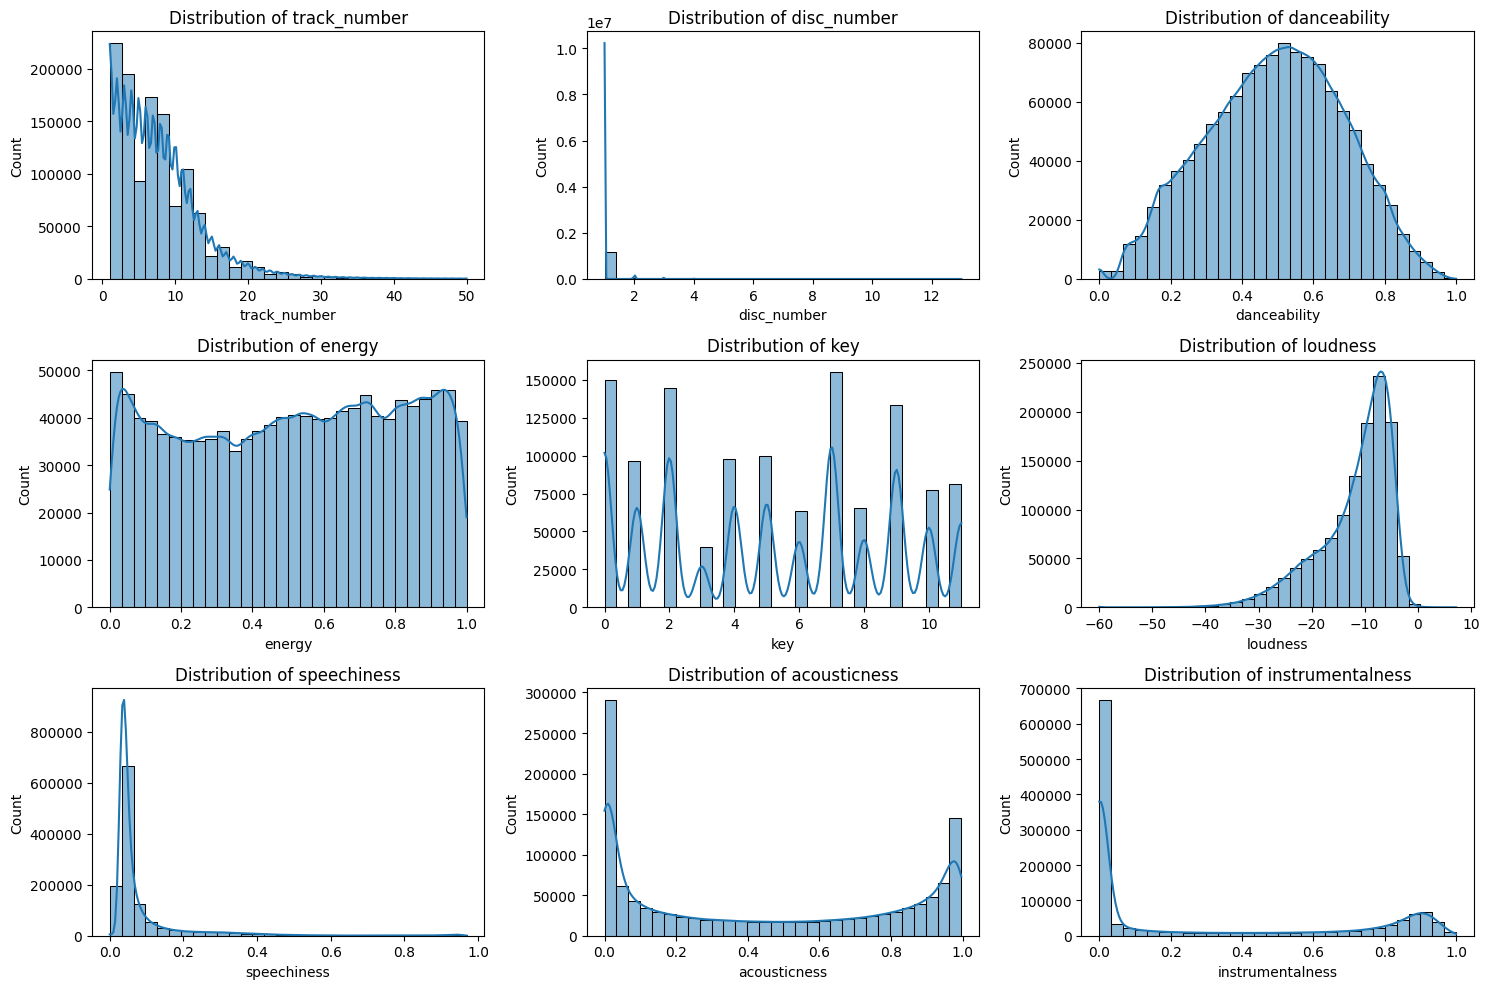

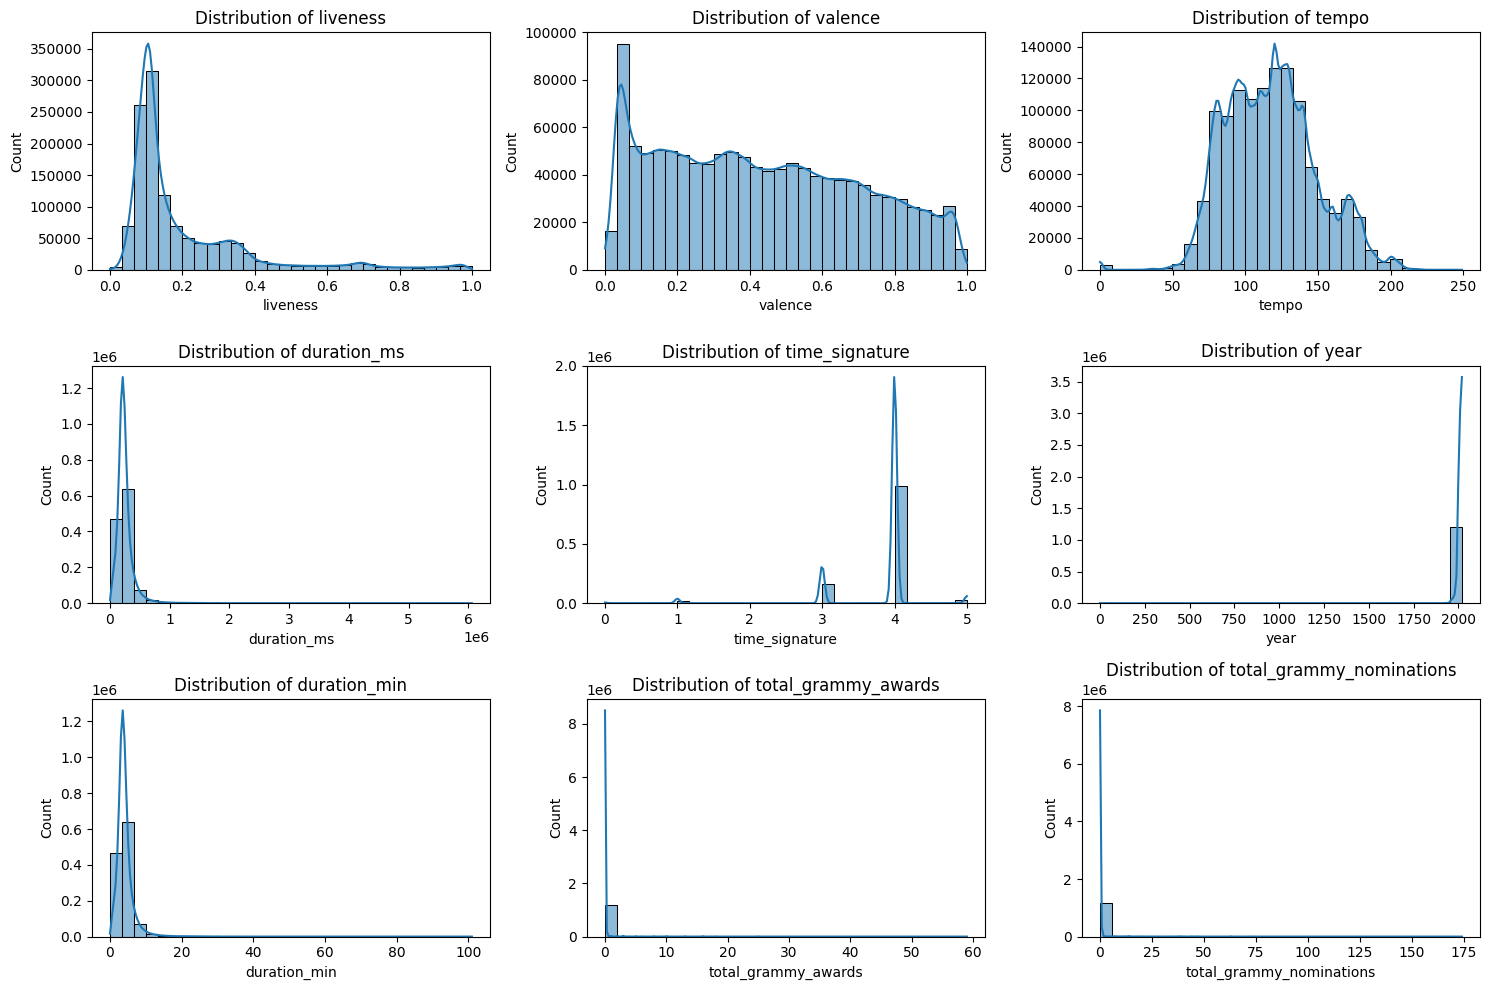

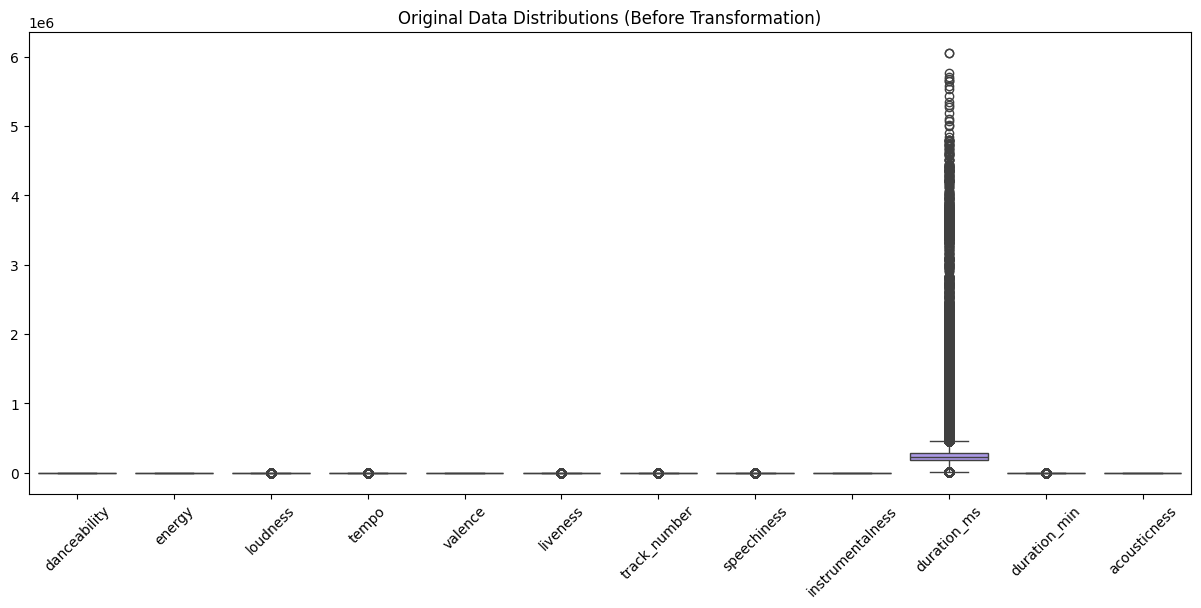

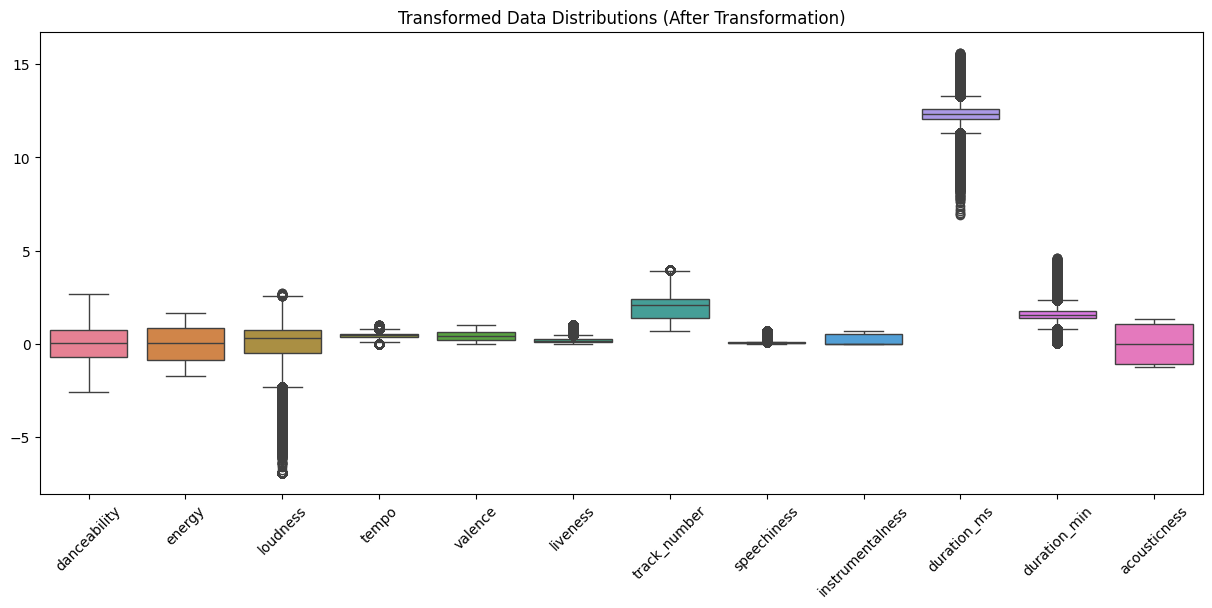

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,valence,tempo,duration_ms,time_signature,year,release_date,release_date_parsed,duration_min,total_grammy_awards,total_grammy_nominations
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,Testify,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],0.693147,1,False,-0.121564,...,0.503,0.473644,12.255501,4.0,1999,1999-11-02,1999-11-02,1.504570,0.0,0.0
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,Guerrilla Radio,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.098612,1,True,0.558567,...,0.489,0.416496,12.236607,4.0,1999,1999-11-02,1999-11-02,1.489903,0.0,0.0
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,Calm Like a Bomb,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.386294,1,False,-0.938775,...,0.370,0.601561,12.607844,4.0,1999,1999-11-02,1999-11-02,1.788680,0.0,0.0
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,Mic Check,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.609438,1,True,-0.279734,...,0.574,0.388665,12.272052,4.0,1999,1999-11-02,1999-11-02,1.517469,0.0,0.0
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,Sleep Now In the Fire,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.791759,1,False,-0.353547,...,0.539,0.510412,12.233693,4.0,1999,1999-11-02,1999-11-02,1.487647,0.0,0.0


In [3]:
# FROM ASHLEY'S PRIOR WORK

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import math
import matplotlib.pyplot as plt
import seaborn as sns

x = df.head()
x

x.to_csv("head.csv", index = False)

# Calculate summary statistics for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
summary_stats = df[num_cols].describe().T

# Display the summary statistics
summary_stats

# Ensure numerical columns are selected
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_plots = len(num_cols)
plots_per_figure = 9
num_figures = math.ceil(num_plots / plots_per_figure)
for fig_num in range(num_figures):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    axes = axes.flatten()

    start_idx = fig_num * plots_per_figure
    end_idx = min(start_idx + plots_per_figure, num_plots)

    for i, col in enumerate(num_cols[start_idx:end_idx]):
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
import numpy as np

df_transformed = df.copy()

# Standardization (Z-score normalization) for normally distributed columns
standardization_cols = ['danceability', 'energy', 'loudness']
scaler_standard = StandardScaler()
df_transformed[standardization_cols] = scaler_standard.fit_transform(df[standardization_cols])

# Min-Max Scaling for features that should retain proportion
normalization_cols = ['tempo', 'valence', 'liveness']
scaler_minmax = MinMaxScaler()
df_transformed[normalization_cols] = scaler_minmax.fit_transform(df[normalization_cols])

# Log Transformation for highly right-skewed distributions
log_transform_cols = ['track_number', 'speechiness', 'instrumentalness', 'duration_ms', 'duration_min']
for col in log_transform_cols:
    df_transformed[col] = np.log1p(df[col])  # log1p helps handle zeros

# Yeo-Johnson Transformation for mixed-distribution features
yeojohnson_cols = ['acousticness']
power_transformer_yeojohnson = PowerTransformer(method='yeo-johnson')
df_transformed[yeojohnson_cols] = power_transformer_yeojohnson.fit_transform(df[yeojohnson_cols])

# No transformation for meaningful count-based features
no_transform_cols = ['total_grammy_awards', 'total_grammy_nominations', 'year', 'time_signature', 'key']
df_transformed[no_transform_cols] = df[no_transform_cols]  # Keep them as they are

transformed_features = standardization_cols + normalization_cols + log_transform_cols + yeojohnson_cols

# Plot boxplots for original vs transformed data
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[transformed_features])
plt.title("Original Data Distributions (Before Transformation)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_transformed[transformed_features])
plt.title("Transformed Data Distributions (After Transformation)")
plt.xticks(rotation=45)
plt.show()

df_transformed.head()

# END OF ASHLEY'S PRIOR WORK

In [4]:
print(df_transformed.columns)

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date', 'release_date_parsed',
       'duration_min', 'total_grammy_awards', 'total_grammy_nominations'],
      dtype='object')


In [5]:
print(df_transformed["liveness"])

0          0.3560
1          0.1550
2          0.1220
3          0.1210
4          0.0789
            ...  
1204023    0.3370
1204024    0.0749
1204025    0.0664
1204026    0.1170
1204027    0.2790
Name: liveness, Length: 1204028, dtype: float64


In [6]:
# Engineer date features

# Convert 'release_date' to datetime
df_transformed['release_date_parsed'] = pd.to_datetime(df_transformed['release_date_parsed'], errors='coerce')

# Extract features from 'release_date'
df_transformed['release_year'] = df_transformed['release_date_parsed'].dt.year
df_transformed['release_month'] = df_transformed['release_date_parsed'].dt.month
df_transformed['release_day'] = df_transformed['release_date_parsed'].dt.day

# Adding release day of week feature (Monday = 0 , Sunday = 6)
df_transformed['release_weekday'] = df_transformed['release_date_parsed'].dt.weekday

# Drop unnecessary columns
df_transformed = df_transformed.drop(columns=['release_date', 'year', 'release_date_parsed'])

In [7]:
# Transform explicit feature into binary 0/1
df_transformed['explicit'] = df_transformed['explicit'].astype(int)

# Transform mode feature into binary 0/1
df_transformed['mode'] = df_transformed['mode'].astype(int)

In [8]:
# Creating target variable (popularity)
df_transformed["popularity"] = df_transformed["total_grammy_awards"] + df_transformed["total_grammy_nominations"]

# Removing original columns
df_transformed.drop(columns=["total_grammy_awards", "total_grammy_nominations"], inplace=True)

In [9]:
# Remove highly correlated features

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_transformed.drop(columns=["popularity"])
y = df_transformed["popularity"]

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Remove identifier columns
X = X.drop(columns=['id', 'name', 'album', 'album_id', 'artists', 'artist_ids'])

# Compute correlation matrix
corr_matrix = X.corr().abs()

# Identify highly correlated features (above 0.85 threshold)
threshold = 0.85
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Drop correlated features
X_filtered = X.drop(columns=high_corr_features)
print("Remaining features after correlation filter:", X_filtered.columns)

Non-numeric columns: Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids'], dtype='object')
Remaining features after correlation filter: Index(['track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'release_year', 'release_month', 'release_day',
       'release_weekday'],
      dtype='object')


In [10]:
# Removing missing values

# Drop rows with NaNs in both X and y

X_filtered = X_filtered.dropna(subset=['release_year', 'release_month', 'release_day', 'release_weekday'])
X_filtered, y = X_filtered.align(y, join="inner", axis=0)

print(X_filtered.isnull().sum())

track_number        0
disc_number         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
release_year        0
release_month       0
release_day         0
release_weekday     0
dtype: int64


In [11]:
# Lasso Regression for Feature Selection

from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Apply cross validation to tune alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 10), cv=5)
lasso_cv.fit(X_scaled, y)

# Get the best alpha value
best_alpha = lasso_cv.alpha_
print("Optimal Alpha from LassoCV:", best_alpha)

# Fit Lasso using the optimal alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_scaled, y)

# Get selected features (non-zero coefficients)
selected_features = X_filtered.columns[lasso.coef_ != 0]
X_lasso_selected = X_filtered[selected_features]

print("Selected features after Lasso:", selected_features)

Optimal Alpha from LassoCV: 0.0001
Selected features after Lasso: Index(['track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'release_year', 'release_month', 'release_day',
       'release_weekday'],
      dtype='object')


In [12]:
# Use RFE to Refine Feature Selection (choosing an optimal number of features)

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Initialize RFECV with cross-validation
estimator = LinearRegression()
rfecv = RFECV(estimator, cv=5)
X_rfecv_selected = rfecv.fit_transform(X_lasso_selected, y)

# Get the best number of features
optimal_features = sum(rfecv.support_)
print("Optimal number of features:", optimal_features)

# Get the selected feature names
selected_features_rfecv = X_lasso_selected.columns[rfecv.support_]
print("Selected features after RFECV:", selected_features_rfecv)

Optimal number of features: 18
Selected features after RFECV: Index(['track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'release_year',
       'release_month', 'release_day', 'release_weekday'],
      dtype='object')


In [13]:
import pandas as pd

# Convert the transformed NumPy array back to a DataFrame with the selected feature names
X_rfecv_selected_df = pd.DataFrame(X_rfecv_selected, columns=selected_features_rfecv)

# This is the final refined feature set to be used for further feature engineering
print("Final shape of X_rfecv_selected_df:", X_rfecv_selected_df.shape)

Final shape of X_rfecv_selected_df: (1204018, 18)


In [14]:
# Check how many polynomial features are needed

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_rfecv_selected_df)

# Fit LassoCV to determine if new features are useful
lasso_cv = LassoCV(cv=5).fit(X_poly, y)

# Count selected polynomial features
num_selected = sum(lasso_cv.coef_ != 0)

print(f"Number of useful polynomial features: {num_selected}")

Number of useful polynomial features: 13


In [15]:
# Identifying useful polynomial features

import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_rfecv_selected_df)

# Fit LassoCV to determine if new features are useful
lasso_cv = LassoCV(cv=5).fit(X_poly, y)

# Get the original and polynomial feature names
feature_names = poly.get_feature_names_out(X_rfecv_selected_df.columns)

# Identify selected polynomial features
selected_poly_features = np.array(feature_names)[lasso_cv.coef_ != 0]

print(f"Selected Polynomial Features ({len(selected_poly_features)}):")
print(selected_poly_features)

Selected Polynomial Features (13):
['track_number release_year' 'disc_number release_year'
 'danceability release_year' 'energy release_year' 'loudness release_year'
 'mode release_year' 'acousticness release_year'
 'instrumentalness release_year' 'liveness release_year' 'release_year^2'
 'release_year release_month' 'release_year release_day'
 'release_year release_weekday']


In [16]:
# Adding polynomial features in

# Create a DataFrame for polynomial features
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_rfecv_selected_df.columns), index=X_rfecv_selected_df.index)

# Keep only the selected polynomial features
X_selected_poly = X_poly_df[selected_poly_features]

# Concatenate with original features
X_final = pd.concat([X_rfecv_selected_df, X_selected_poly], axis=1)

print("Final feature set shape:", X_final.shape)

Final feature set shape: (1204018, 31)


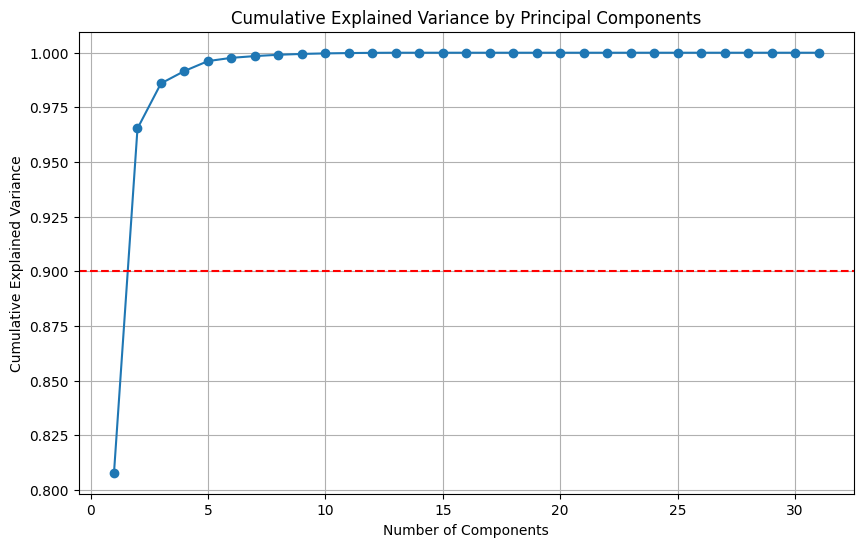

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
pca.fit(X_final)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')  # Example threshold for 90%
plt.show()

In [18]:
from sklearn.decomposition import PCA
import pandas as pd

# Fit PCA to feature set
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_final)

# Create a DataFrame for the PCA loadings
loadings = pd.DataFrame(pca.components_, columns=X_final.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the loadings
print("PCA Loadings:\n", loadings)

# Choose a threshold to select features for each PC
threshold = 0.1
selected_features = []

for i in range(loadings.shape[0]):
    pc_loadings = loadings.iloc[i]
    significant_features = pc_loadings[abs(pc_loadings) > threshold].index.tolist()
    selected_features.extend(significant_features)

# Remove duplicates
selected_features = list(set(selected_features))

print("Selected features based on PCA loadings:", selected_features)


PCA Loadings:
      track_number   disc_number      explicit  danceability    energy  \
PC1 -1.034490e-06 -2.582308e-07  9.830505e-07  1.978216e-06  0.000004   
PC2 -7.624343e-08  5.650172e-08  4.716228e-07  1.837186e-06  0.000002   
PC3  1.055898e-06  1.094227e-06  1.322198e-06 -4.658310e-07 -0.000002   
PC4 -2.111619e-09  7.719579e-08  1.196808e-06 -7.126350e-06 -0.000022   
PC5 -3.134321e-05 -9.076884e-06  1.394798e-05  1.513695e-04  0.000282   
PC6  2.640727e-05 -5.163609e-06  1.432602e-05  4.665122e-04 -0.000114   

     loudness          mode   speechiness  acousticness  instrumentalness  \
PC1  0.000005 -6.924098e-07  1.600215e-07     -0.000004     -6.236781e-08   
PC2  0.000002  2.792905e-08  8.340396e-08     -0.000001     -3.632289e-07   
PC3 -0.000002 -1.417278e-07  1.362898e-07      0.000001     -2.588188e-08   
PC4 -0.000023 -1.152223e-06 -2.387732e-07      0.000017      1.125338e-06   
PC5  0.000271 -3.204968e-06  3.971694e-06     -0.000262     -2.982155e-05   
PC6 -0.0000

In [19]:
# Creating final DataFrame with selected features
X_final_selected = X_final[selected_features]

# Displaying the shape and the first few rows of the final DataFrame
print("Final DataFrame shape:", X_final_selected.shape)
print("Final DataFrame head:\n", X_final_selected.head())

Final DataFrame shape: (1204018, 8)
Final DataFrame head:
    release_year^2  danceability release_year  loudness release_year  \
0       3996001.0                -243.006585            1835.108769   
1       3996001.0                1116.574632            1730.608389   
2       3996001.0               -1876.611924            1827.951209   
3       3996001.0                -559.188264            1711.712430   
4       3996001.0                -706.739714            1454.326565   

   acousticness release_year  release_year release_day  \
0               -2286.962913                    3998.0   
1               -2386.005855                    3998.0   
2               -2307.107163                    3998.0   
3               -1335.604595                    3998.0   
4               -2471.775043                    3998.0   

   release_year release_weekday  release_year release_month  \
0                        1999.0                     21989.0   
1                        1999.0        

In [22]:
# Saving the final DataFrame to a CSV file
X_final_selected.to_csv('final_df.csv', index=False)

print("Final DataFrame saved as 'final_df.csv'")

Final DataFrame saved as 'final_df.csv'
